# Определение перспективного тарифа для телеком-компании

Мы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
*   минута разговора: 3 рубля
*   сообщение: 3 рубля
*   1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
*   минута разговора: 1 рубль
*   сообщение: 1 рубль
*   1 Гб интернет-трафика: 150 рублей

## Изучение данных из файлов

In [1]:
# импорт всех необходимых библиотек для дальнейшей работы
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy import stats as st

In [2]:
# считываем .csv файлы с таблицами, записываем их в одноимённые переменные
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

Поочерёдно выведем первые строки каждой таблицы и общую информацию о ней:

In [3]:
# выводим первые 10 строк и общую информацию таблицы 'users'
display(users.head(10))
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Как можем видеть, данные имеют надлежащий вид. Отсутствуют необъяснимые пропуски данных. В таблице необходимо лишь заменить тип данных в столбце `reg_date` и `churn_date`.

Информация по столбцам:
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана

In [4]:
# выводим первые 10 строк и общую информацию таблицы 'calls'
display(calls.head(10))
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице отсутствуют пропущенные данные и в целом имеют удовлетворительный вид. Необходима лишь так же смена типа данных столбца `call_date`

Информация по столбцам:
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

In [5]:
# выводим первые 10 строк и общую информацию таблицы 'messages'
display(messages.head(10))
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Отсутствуют пропуски, данные имеют надлежащий вид. Неодходимо лишь изменение типа данных столбца `message_date`

Информация по столбцам: 
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

In [6]:
# выводим первые 10 строк и общую информацию таблицы 'internet'
display(internet.head(10))
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Имеется лишний столбец `Unnamed: 0`, который требует удаления. Так же необходима замена типа данных столбца `session_date`

Информация по столбцам:
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

In [7]:
# выводим первые 10 строк и общую информацию таблицы 'tariffs'
display(tariffs.head())
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Вся таблица имеет надлежащий вид.

Информация по столбцам:
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Вывод

В общем и целом можно заметить, что каждая таблица имеет удовлетворительный вид. Нет пропусков, все столбцы имеют надлежащее название. Необходима лишь смена типа данных, удаление столбца и дальнейший, более глубокий анализ.

## Предобработка данных

Проведём предварительно обработку данных таблицы. Изменим тип данных, удалим или исправим ошибки в данных и добавим необходимую для анализа информацию.

### Изменение типа данных

Изменим в указанных выше столбцах тип данных на `datetime64`.

In [8]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Удаление лишнего столбца `Unnamed: 0` в таблице `internet`

In [9]:
internet = internet.drop('Unnamed: 0', 1)

### Подсчёт и внесение необходимых данных

Для дальнейшего анализа нам необходимо подсчитать для каждого пользователя такие данные, как:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [10]:
# добавляем к строке каждого звонка, веб-сессии и сообщения в какой месяц он был сделан
calls['month'] = calls['call_date'].dt.month.astype('int')
internet['month'] = internet['session_date'].dt.month.astype('int')
messages['month'] = messages['message_date'].dt.month.astype('int')

In [11]:
# делаем функцию <month> для перезаписи месяцев в строчный тип
# на вход функция получает порядковое число месяца:
def month_name(month_number):
# если числовое значение месяца 1, то:
    if month_number == 1:
# месяц - 'january'
        return 'january'
# если числовое значение месяца 2, то:
    if month_number == 2:
# месяц - 'february'
        return 'february'
# если числовое значение месяца 3, то:
    if month_number == 3:
# месяц - 'march'
        return 'march'
# если числовое значение месяца 4, то:
    if month_number == 4:
# месяц - 'april'
        return 'april'
# если числовое значение месяца 5, то:
    if month_number == 5:
# месяц - 'may'
        return 'may'
# если числовое значение месяца 6, то:
    if month_number == 6:
# месяц - 'june'
        return 'june'
# если числовое значение месяца 7, то:
    if month_number == 7:
# месяц - 'july'
        return 'july'
# если числовое значение месяца 8, то:
    if month_number == 8:
# месяц - 'august'
        return 'august'
# если числовое значение месяца 9, то:
    if month_number == 9:
# месяц - 'september'
        return 'september'
# если числовое значение месяца 10, то:
    if month_number == 10:
# месяц - 'october'
        return 'october'
# если числовое значение месяца 11, то:
    if month_number == 11:
# месяц - 'november'
        return 'november'
# в ином случае месяц - 'december'
    return 'december'

In [12]:
# создаём функцию <real_call_time> для подсчёта, сколько реально минут списывается за звонок
# на вход функция получает вещественное число:
def real_call_time(call_time):
# проверяем, если у длительности звонка остаток от деления на 1 не 0, то:
    if ((call_time % 1) != 0 ):
# делаем целочисленное деление длительности звонка и добавляем 1 минуту
        return (call_time // 1) + 1
# в ином случае продолжительность звонка прежняя
    return call_time

In [13]:
# с помощью созданных функций перезаписываем данные в столбцах `month` и `duration`

calls['month'] = calls['month'].apply(month_name)
internet['month'] = internet['month'].apply(month_name)
messages['month'] = messages['month'].apply(month_name)
calls['duration'] = calls['duration'].apply(real_call_time)

Выведем первые 10 строк таблицы `calls` с изменёнными и добавленными данными:

In [14]:
calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,july
1,1000_1,2018-08-17,0.0,1000,august
2,1000_2,2018-06-11,3.0,1000,june
3,1000_3,2018-09-21,14.0,1000,september
4,1000_4,2018-12-15,6.0,1000,december
5,1000_5,2018-11-02,0.0,1000,november
6,1000_6,2018-10-18,0.0,1000,october
7,1000_7,2018-08-22,19.0,1000,august
8,1000_8,2018-09-15,19.0,1000,september
9,1000_9,2018-08-15,0.0,1000,august


С помощью сводных таблиц посчитаем помесячное потребление пользователями интернет-траффика, минут и сообщений:

#### Подсчет количества и продолжительности звонков пользователей по месяцам

In [15]:
# делаем сводную таблицу с индексом в виде ID пользователя и подсчётом кол-ва израсходованных минут в каждом месяце
calls_pivot = pd.pivot_table(calls,
                             index=['user_id', 'month'],
                             values='duration',
                             aggfunc=('sum', 'count')
                            ).reset_index()

calls_pivot = calls_pivot.rename(columns = {'count':'calls_count',
                                            'sum':'calls_sum'}
                                )

calls_pivot.head(10)

,user_id,month,calls_count,calls_sum
0,1000,august,52,408.0
1,1000,december,46,333.0
2,1000,july,47,340.0
3,1000,june,43,172.0
4,1000,may,22,159.0
5,1000,november,43,338.0
6,1000,october,57,350.0
7,1000,september,58,466.0
8,1001,december,63,414.0
9,1001,november,59,430.0


#### Подсчет количества используемого интернет-траффика в месяц

In [16]:
# делаем сводную таблицу с помесячным подсчетом общего объёма интернет-сессий для каждого пользователя
internet_pivot = pd.pivot_table(internet,
                                index=['user_id','month'],
                                values='mb_used',
                                aggfunc='sum'
                               ).reset_index()

internet_pivot.head(10)

,user_id,month,mb_used
0,1000,august,14055.93
1,1000,december,9817.61
2,1000,july,14003.64
3,1000,june,23233.77
4,1000,may,2253.49
5,1000,november,14756.47
6,1000,october,14702.49
7,1000,september,14568.91
8,1001,december,14036.66
9,1001,november,18429.34


Учитывая условия подсчета общей суммы веб-сессий в месяц, округлим значения до круглых Гб:

In [17]:
# создаём функцию <right_mb_used> для подсчета верного кол-ва израсходованного траффика по тарифу
# функция получает на вход кол-во израсходованного траффика
def right_internet_used(mb_used):
# если использованные Мб нельзя округлить до целых Гб, то:
    if ((mb_used % 1024) != 0):
# перевести в Мб в Гб и добавить еденицу
        return mb_used - (mb_used % 1024) + 1024
# иначе просто перевести Мб в Гб
    return mb_used

In [18]:
# применим написанную функцию к столбцу `mb_used`
internet_pivot['mb_used'] = internet_pivot['mb_used'].apply(right_internet_used)

internet_pivot.head(10)

,user_id,month,mb_used
0,1000,august,14336.0
1,1000,december,10240.0
2,1000,july,14336.0
3,1000,june,23552.0
4,1000,may,3072.0
5,1000,november,15360.0
6,1000,october,15360.0
7,1000,september,15360.0
8,1001,december,14336.0
9,1001,november,18432.0


#### Подсчет количества исходящих сообщений по месяцам

In [19]:
# делаем сводную таблицу с помесячным подсчетом исходящих сообщений для каждого пользователя
messages_pivot = pd.pivot_table(messages,
                                index=['user_id', 'month'],
                                values='id',
                                aggfunc='count'
                               ).rename(columns = {'id':'count_messages'}
                               ).reset_index()

messages_pivot.head(10)

,user_id,month,count_messages
0,1000,august,81
1,1000,december,70
2,1000,july,75
3,1000,june,60
4,1000,may,22
5,1000,november,58
6,1000,october,73
7,1000,september,57
8,1002,august,13
9,1002,december,12


#### Общая таблица с подсчетами

In [20]:
# при помощи метода <merge> объединяем все сводные таблицы в одну
monthly_users_spending = pd.merge(calls_pivot,
                                  internet_pivot,
                                  on=('user_id', 'month'),
                                  how='outer')

monthly_users_spending = pd.merge(monthly_users_spending,
                                  messages_pivot,
                                  on=('user_id', 'month'),
                                  how='outer')

monthly_users_spending.head(10)

,user_id,month,calls_count,calls_sum,mb_used,count_messages
0,1000,august,52.0,408.0,14336.0,81.0
1,1000,december,46.0,333.0,10240.0,70.0
2,1000,july,47.0,340.0,14336.0,75.0
3,1000,june,43.0,172.0,23552.0,60.0
4,1000,may,22.0,159.0,3072.0,22.0
5,1000,november,43.0,338.0,15360.0,58.0
6,1000,october,57.0,350.0,15360.0,73.0
7,1000,september,58.0,466.0,15360.0,57.0
8,1001,december,63.0,414.0,14336.0,NaN
9,1001,november,59.0,430.0,18432.0,NaN


In [21]:
monthly_users_spending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   object 
 2   calls_count     3174 non-null   float64
 3   calls_sum       3174 non-null   float64
 4   mb_used         3203 non-null   float64
 5   count_messages  2717 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 175.8+ KB


Заполним все пропуски нулевыми значениями:

In [22]:
monthly_users_spending = monthly_users_spending.fillna(0)

In [23]:
monthly_users_spending.isna().sum()

user_id           0
month             0
calls_count       0
calls_sum         0
mb_used           0
count_messages    0
dtype: int64

Объеденим таблицы `users` и `monthly_users_spending` для отображения в единой таблице полной информации помесячных расходов пользователями.

In [24]:
monthly_users_spending.head(10)

,user_id,month,calls_count,calls_sum,mb_used,count_messages
0,1000,august,52.0,408.0,14336.0,81.0
1,1000,december,46.0,333.0,10240.0,70.0
2,1000,july,47.0,340.0,14336.0,75.0
3,1000,june,43.0,172.0,23552.0,60.0
4,1000,may,22.0,159.0,3072.0,22.0
5,1000,november,43.0,338.0,15360.0,58.0
6,1000,october,57.0,350.0,15360.0,73.0
7,1000,september,58.0,466.0,15360.0,57.0
8,1001,december,63.0,414.0,14336.0,0.0
9,1001,november,59.0,430.0,18432.0,0.0


In [25]:
full_monthly_data = pd.merge(users,
                             monthly_users_spending,
                             on='user_id',
                             how='outer'
                            )

full_monthly_data = full_monthly_data.rename(columns={'tariff':'tariff_name'})

full_monthly_data = pd.merge(full_monthly_data,
                             tariffs,
                             on='tariff_name',
                             how='outer'
                            )

full_monthly_data.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,calls_count,calls_sum,mb_used,count_messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,august,52.0,408.0,14336.0,81.0,1000,30720,3000,1950,150,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,december,46.0,333.0,10240.0,70.0,1000,30720,3000,1950,150,1,1
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,july,47.0,340.0,14336.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,june,43.0,172.0,23552.0,60.0,1000,30720,3000,1950,150,1,1
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,may,22.0,159.0,3072.0,22.0,1000,30720,3000,1950,150,1,1
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,november,43.0,338.0,15360.0,58.0,1000,30720,3000,1950,150,1,1
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,october,57.0,350.0,15360.0,73.0,1000,30720,3000,1950,150,1,1
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,september,58.0,466.0,15360.0,57.0,1000,30720,3000,1950,150,1,1
8,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,august,55.0,380.0,9216.0,37.0,1000,30720,3000,1950,150,1,1
9,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,december,108.0,802.0,10240.0,75.0,1000,30720,3000,1950,150,1,1


In [26]:
full_monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   age                    3216 non-null   int64         
 2   churn_date             189 non-null    datetime64[ns]
 3   city                   3216 non-null   object        
 4   first_name             3216 non-null   object        
 5   last_name              3216 non-null   object        
 6   reg_date               3216 non-null   datetime64[ns]
 7   tariff_name            3216 non-null   object        
 8   month                  3214 non-null   object        
 9   calls_count            3214 non-null   float64       
 10  calls_sum              3214 non-null   float64       
 11  mb_used                3214 non-null   float64       
 12  count_messages         3214 non-null   float64       
 13  mes

Как можем заметить, 2 строки таблицы имеют пропуски в важных для рассчетов столбцах. Учитывая незначительное кол-во строк, заполним их важные для рассчета столбцы нулями.

Помимо этого, заменим данные в этих столбцах на целочисленный вид.

In [27]:
# заполним пропуски в столбцах 'calls_sum', 'mb_used' и 'count_messages'
full_monthly_data['calls_sum'] = full_monthly_data['calls_sum'].fillna(0)
full_monthly_data['mb_used'] = full_monthly_data['mb_used'].fillna(0)
full_monthly_data['count_messages'] = full_monthly_data['count_messages'].fillna(0)

# переводим данные столбцов в целочисленный вид
full_monthly_data['calls_sum'] = full_monthly_data['calls_sum'].astype('int')
full_monthly_data['mb_used'] = full_monthly_data['mb_used'].astype('int')
full_monthly_data['count_messages'] = full_monthly_data['count_messages'].astype('int')

#### Рассчет помесячной прибыли с каждого пользователя

Создадим функцию `monthly_profit` для расчёта помесячной прибыли с каждого пользователя:

In [28]:
# объявляем функцию <monthly_profit> для рассчета прибыли,
# на вход функция получает строку, содержащую данные пользователя за конкретный месяц
def monthly_profit(user):
# рассчитаем отдельно прибыль за интернет, звонки и сообщения
# отдельно для каждого параметра рассчитаем, был ли превышен лимит
 
# если тарифный план по звонкам не был превышен,
# т.е. разница израсходованных минут и включенных в тариф минут меньше или равна нулю, то:
    if (user['calls_sum'] - user['minutes_included']) <= 0:
# прибыль с минут равна 0
        calls_profit = 0
# иначе:
    else:
# считаем прибыль, как разницу израсходованных минут и включенных в тариф минут, умноженную
# на цену минуты по тарифу
        calls_profit = (
            (user['calls_sum'] - user['minutes_included']) * user['rub_per_minute']
        )
# если тарифный план по интернету не был превышен,
# т.е. разница израсходованных Мб и включенных в тариф Мб меньше или равна нулю, то:        
    if (user['mb_used'] - user['mb_per_month_included']) <= 0:
# прибыль с интернета равна 0
        internet_profit = 0
# иначе:
    else:
# считаем прибыль с интернета, как разницу израсходованных Мб и включенных в тариф Мб,
# переведённую в Гб и помноженную на цену за Гб по тарифу
        internet_profit = (
            (user['mb_used'] - user['mb_per_month_included']) / 1024 * user['rub_per_gb']
        )
# если тарифный план по СМС не был превышен,
# т.е. разница израсходованных СМС и включенных в тариф СМС меньше или равна нулю, то:    
    if (user['count_messages'] - user['messages_included']) <= 0:
# прибыль с СМС равна 0
        messages_profit = 0
# иначе:
    else:
# считаем прибыль с СМС, как разницу отправленных СМС и включенного кол-ва СМС по тарифу,
# умноженную на цену за СМС по тарифу
        messages_profit = (
            (user['count_messages'] - user['messages_included']) * user['rub_per_message']
        )
# рассчитываем общую прибыль за месяц, не учитывая абонентскую плату за тариф
# считаем её, как сумму прибыли со всех параметров, плюс месячная абонентская плата
    profit =(
        calls_profit + internet_profit + messages_profit + user['rub_monthly_fee']
    )
# в конце функция возвращает полученную прибыль, т.е. переменную 'profit'
    return profit

In [29]:
full_monthly_data['profit'] = full_monthly_data.apply(monthly_profit, axis = 1)

full_monthly_data.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,calls_count,...,mb_used,count_messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,august,52.0,...,14336,81,1000,30720,3000,1950,150,1,1,1950.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,december,46.0,...,10240,70,1000,30720,3000,1950,150,1,1,1950.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,july,47.0,...,14336,75,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,june,43.0,...,23552,60,1000,30720,3000,1950,150,1,1,1950.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,may,22.0,...,3072,22,1000,30720,3000,1950,150,1,1,1950.0
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,november,43.0,...,15360,58,1000,30720,3000,1950,150,1,1,1950.0
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,october,57.0,...,15360,73,1000,30720,3000,1950,150,1,1,1950.0
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,september,58.0,...,15360,57,1000,30720,3000,1950,150,1,1,1950.0
8,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,august,55.0,...,9216,37,1000,30720,3000,1950,150,1,1,1950.0
9,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,december,108.0,...,10240,75,1000,30720,3000,1950,150,1,1,1950.0


**Вывод**

Полностью обработав все данные, заполним образовавшиеся пропуски и выислив недостающие данные, мы можем приступить к полноценному анализу данных.

## Анализ данных

### Анализ поведения пользователей тарифа 'smart'

#### Анализ использования пакета минут пользователями

array([[<AxesSubplot:title={'center':'calls_sum'}>]], dtype=object)

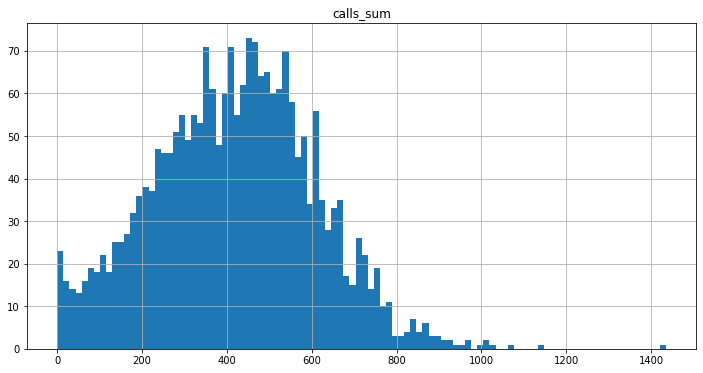

In [30]:
full_monthly_data.query(
    'tariff_name == "smart"'
    ).hist(
    'calls_sum',
    bins=100,
    figsize=(12, 6)
)

In [31]:
# посчитаем среднее и медианное значения по кол-ву используемых минут
# пользователями тарифа Smart

# для начала получим Series с кол-вом использованных минут клиентов тарифа 'smart'
calls_smart = full_monthly_data.query('tariff_name == "smart"')
calls_smart = calls_smart['calls_sum']

print('Среднее значение помесячного количества используемых минут пользователями тарифа Smart равна:',
     calls_smart.mean())
print('Медианное значение помесячного количества используемых минут пользователями тарифа Smart равна:',
     calls_smart.median())

Среднее значение помесячного количества используемых минут пользователями тарифа Smart равна: 417.747533632287
Медианное значение помесячного количества используемых минут пользователями тарифа Smart равна: 421.5


In [32]:
# считаем дисперсию по минутам пользователей тарифа 'smart'
# используем параметр ddof = 1, т.к. известно, что это данные лишь небольшой выборки пользователей
calls_smart_var = np.var(calls_smart, ddof=1)
print('Дисперсия помесячного количества используемых минут пользователями тарифа Smart равна:',
     calls_smart_var)

Дисперсия помесячного количества используемых минут пользователями тарифа Smart равна: 36281.39383644459


In [33]:
# считаем стандартное отклонение по минутам пользователей тарифа 'smart'
# т.к. нам уже известна дисперсия, то вычислим отклонение, как квадратный корень дисперсии
print('Стандартное отклонение количества используемых минут пользователями тарифа Smart равно:',
     np.sqrt(calls_smart_var))

Стандартное отклонение количества используемых минут пользователями тарифа Smart равно: 190.47675405792853


**Вывод**

Как можем заметить по графику, дисперсии и среднему отклонению, большая часть пользователей пользуется минутами как сверх пакета, так и не использует его полностью. Теорию о 'вбросах' строит опровернуть, поскольку медианное и среднее значения выборки сильно близки друг к другу.

Стоит предположить, что такой разброс обоснован низкой вариативностью тарифов. Это в свою очередь приводит к тому, что из-за использующие меньшее количество минут, берут тариф из-за неимения альтернативы, а использующие большее, берут тариф из-за различия цены по тарифам в почти 4 раза, что делает переплату сверх пакета небольшого кол-ва минут выгоднее, чем платёж по пакету *Ultra*.

#### Анализ использования интернет-пакета пользователями

array([[<AxesSubplot:title={'center':'mb_used'}>]], dtype=object)

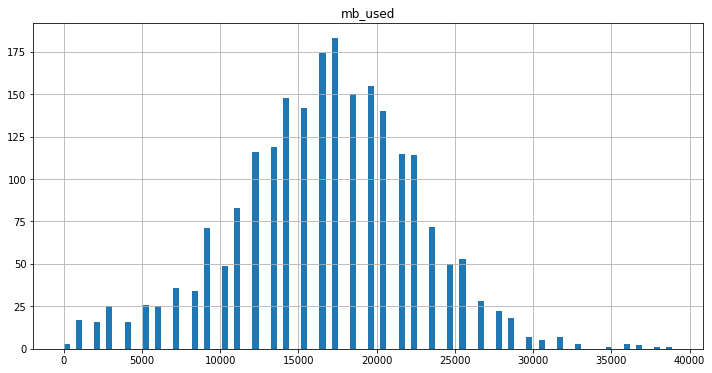

In [34]:
full_monthly_data.query(
    'tariff_name == "smart"'
    ).hist(
    'mb_used',
    bins=100,
    figsize=(12, 6)
)

In [35]:
# посчитаем среднее и медианное значения по использованию интернет-пакета
# пользователями тарифа Smart

# для начала получим Series с объёмом интернет сессий клиентов тарифа 'smart'
internet_smart = full_monthly_data.query('tariff_name == "smart"')
internet_smart = internet_smart['mb_used']

print('Среднее значение помесячного объмёма интернет сессий пользователей тарифа Smart равна:',
     internet_smart.mean())
print('Медианное значение помесячного объмёма интернет сессий пользователей тарифа Smart равна:',
     internet_smart.median())

Среднее значение помесячного объмёма интернет сессий пользователей тарифа Smart равна: 16713.241255605382
Медианное значение помесячного объмёма интернет сессий пользователей тарифа Smart равна: 17408.0


In [36]:
# считаем дисперсию по объёма интернет сессий пользователей тарифа 'smart'
# используем параметр ddof = 1, т.к. известно, что это данные лишь небольшой выборки пользователей
internet_smart_var = np.var(internet_smart, ddof=1)
print('Дисперсия помесячного помесячного объмёма интернет сессий пользователей тарифа Smart равна:',
     internet_smart_var)

Дисперсия помесячного помесячного объмёма интернет сессий пользователей тарифа Smart равна: 34742943.65015904


In [37]:
# считаем стандартное отклонение по минутам пользователей тарифа 'smart'
# т.к. нам уже известна дисперсия, то вычислим отклонение, как квадратный корень дисперсии
print('Стандартное отклонение помесячного объмёма интернет сессий пользователей тарифа Smart равно:',
     np.sqrt(internet_smart_var))

Стандартное отклонение помесячного объмёма интернет сессий пользователей тарифа Smart равно: 5894.314519107293


**Вывод**

По гистограмме можно заметить классический колокол распределения. Учитывая шаг значений в 1024 Мб, можно сказать, что медианное и среднее значения имеют низкий разброс, что говорит от отсутствии 'выбросов'. Тем же самым можно обосновать высокие значения дисперсии и стандартного отклонения. 

Однако вновь можно заметить большую часть пользователей, превышающие предоставляемый пакет тарифом. Стоит предположить, что причиной этого является так же малая вариативность тарифов, как описано ранее.

#### Анализ пакета СМС пользователями

array([[<AxesSubplot:title={'center':'count_messages'}>]], dtype=object)

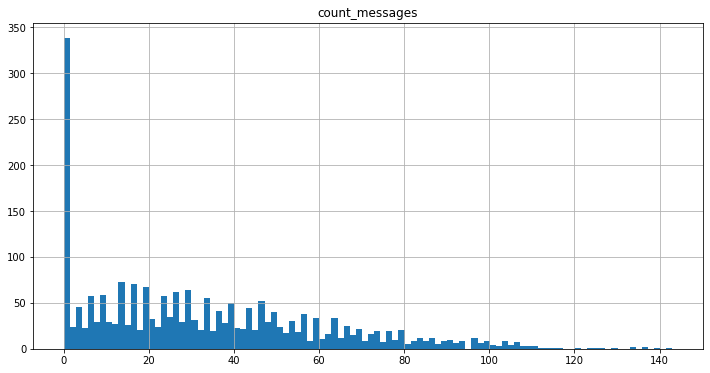

In [38]:
full_monthly_data.query(
    'tariff_name == "smart"'
    ).hist(
    'count_messages',
    bins=100,
    figsize=(12, 6)
)

In [39]:
# посчитаем среднее и медианное значения по кол-ву СМС от
# пользователей тарифа Smart

# для начала получим Series с количеством СМС от клиентов тарифа 'smart'
messages_smart = full_monthly_data.query('tariff_name == "smart"')
messages_smart = messages_smart['count_messages']

print('Среднее значение помесячного количества СМС от пользователей тарифа Smart равна:',
     messages_smart.mean())
print('Медианное значение помесячного количества СМС от пользователей тарифа Smart равна:',
     messages_smart.median())

Среднее значение помесячного количества СМС от пользователей тарифа Smart равна: 33.36905829596412
Медианное значение помесячного количества СМС от пользователей тарифа Smart равна: 28.0


In [40]:
# считаем дисперсию по кол-ву СМС от пользователей тарифа 'smart'
# используем параметр ddof = 1, т.к. известно, что это данные лишь небольшой выборки пользователей
messages_smart_var = np.var(messages_smart, ddof=1)
print('Дисперсия помесячного количества СМС от пользователей тарифа Smart равна:',
     messages_smart_var)

Дисперсия помесячного количества СМС от пользователей тарифа Smart равна: 796.955255730113


In [41]:
# считаем стандартное отклонение по кол-ву СМС от пользователей тарифа 'smart'
# т.к. нам уже известна дисперсия, то вычислим отклонение, как квадратный корень дисперсии
print('Стандартное отклонение помесячного количества СМС от пользователей тарифа Smart равно:',
     np.sqrt(messages_smart_var))

Стандартное отклонение помесячного количества СМС от пользователей тарифа Smart равно: 28.230395954185852


**Вывод**

Как можем заметить, данный параметр имеет, сравнительно предыдущих, низкие показатели разброса, а так же вновь практические идентичные медианное и среднее значения.

Распределение гистограммы имеет более обоснованное к данному параметру распределение Пуассона, а не колокол.

### Анализ пользователей тарифа 'ultra'

#### Анализ использования пакета минут пользователями

array([[<AxesSubplot:title={'center':'calls_sum'}>]], dtype=object)

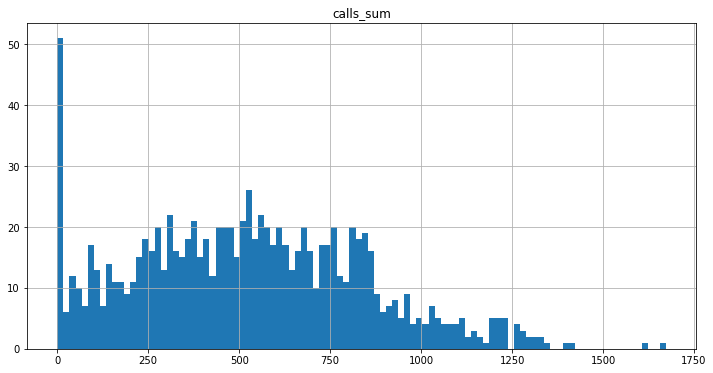

In [42]:
full_monthly_data.query(
    'tariff_name == "ultra"'
    ).hist(
    'calls_sum',
    bins=100,
    figsize=(12, 6)
)

In [43]:
# посчитаем среднее и медианное значения по кол-ву используемых минут
# пользователями тарифа Ultra

# для начала получим Series с кол-вом использованных минут клиентов тарифа 'smart'
calls_ultra = full_monthly_data.query('tariff_name == "ultra"')
calls_ultra = calls_ultra['calls_sum']

print('Среднее значение помесячного количества используемых минут пользователями тарифа Ultra равна:',
     calls_ultra.mean())
print('Медианное значение помесячного количества используемых минут пользователями тарифа Ultra равна:',
     calls_ultra.median())

Среднее значение помесячного количества используемых минут пользователями тарифа Ultra равна: 526.0892494929006
Медианное значение помесячного количества используемых минут пользователями тарифа Ultra равна: 518.0


In [44]:
# считаем дисперсию по минутам пользователей тарифа 'ultra'
# используем параметр ddof = 1, т.к. известно, что это данные лишь небольшой выборки пользователей
calls_ultra_var = np.var(calls_ultra, ddof=1)
print('Дисперсия помесячного количества используемых минут пользователями тарифа Ultra равна:',
     calls_ultra_var)

Дисперсия помесячного количества используемых минут пользователями тарифа Ultra равна: 101052.49354928388


In [45]:
# считаем стандартное отклонение по минутам пользователей тарифа 'ultra'
# т.к. нам уже известна дисперсия, то вычислим отклонение, как квадратный корень дисперсии
print('Стандартное отклонение количества используемых минут пользователями тарифа Ultra равно:',
     np.sqrt(calls_ultra_var))

Стандартное отклонение количества используемых минут пользователями тарифа Ultra равно: 317.8875485911392


**Вывод**

Как можем заметить, кол-во используемых минут в среднем лишь едва превышает пакет минут тарифа 'Smart'. Помимо этого заметен меньший разброс показателей и более естественную гистограмму.

#### Анализ использования интернет-пакета пользователями

array([[<AxesSubplot:title={'center':'mb_used'}>]], dtype=object)

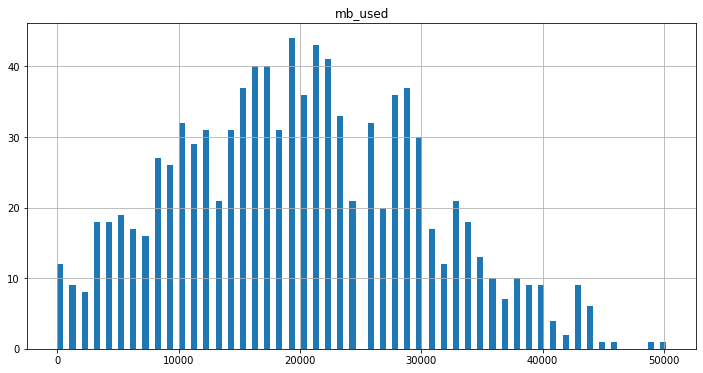

In [46]:
full_monthly_data.query(
    'tariff_name == "ultra"'
    ).hist(
    'mb_used',
    bins=100,
    figsize=(12, 6)
)

In [47]:
# посчитаем среднее и медианное значения по использованию интернет-пакета
# пользователями тарифа Smart

# для начала получим Series с объёмом интернет сессий клиентов тарифа 'smart'
internet_ultra = full_monthly_data.query('tariff_name == "ultra"')
internet_ultra = internet_ultra['mb_used']

print('Среднее значение помесячного объмёма интернет сессий пользователей тарифа Ultra равна:',
     internet_ultra.mean())
print('Медианное значение помесячного объмёма интернет сессий пользователей тарифа Ultra равна:',
     internet_ultra.median())

Среднее значение помесячного объмёма интернет сессий пользователей тарифа Ultra равна: 19942.036511156188
Медианное значение помесячного объмёма интернет сессий пользователей тарифа Ultra равна: 19456.0


In [48]:
# считаем дисперсию по объёма интернет сессий пользователей тарифа 'smart'
# используем параметр ddof = 1, т.к. известно, что это данные лишь небольшой выборки пользователей
internet_ultra_var = np.var(internet_ultra, ddof=1)
print('Дисперсия помесячного помесячного объмёма интернет сессий пользователей тарифа Ultra равна:',
     internet_ultra_var)

Дисперсия помесячного помесячного объмёма интернет сессий пользователей тарифа Ultra равна: 102108804.45754883


In [49]:
# считаем стандартное отклонение по минутам пользователей тарифа 'smart'
# т.к. нам уже известна дисперсия, то вычислим отклонение, как квадратный корень дисперсии
print('Стандартное отклонение помесячного объмёма интернет сессий пользователей тарифа Ultra равно:',
     np.sqrt(internet_ultra_var))

Стандартное отклонение помесячного объмёма интернет сессий пользователей тарифа Ultra равно: 10104.890125951337


**Вывод**

Показатели дисперсии крайне велики, по сравнению с показателями предыдущего тарифа. Медианное и среднее значения так же слабо выше предыдущих показателей.

#### Анализ использования пакета СМС пользователями

array([[<AxesSubplot:title={'center':'count_messages'}>]], dtype=object)

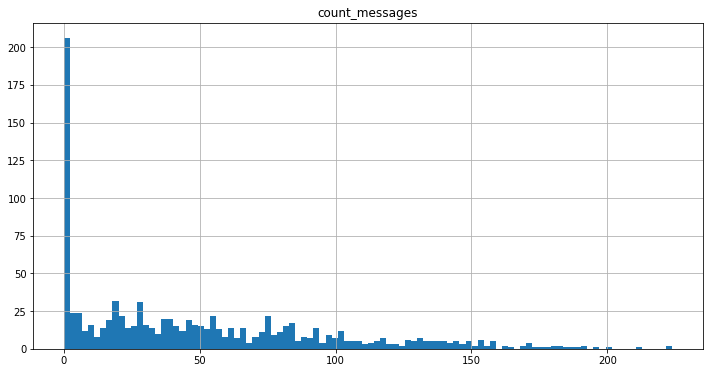

In [50]:
full_monthly_data.query(
    'tariff_name == "ultra"'
    ).hist(
    'count_messages',
    bins=100,
    figsize=(12, 6)
)

In [51]:
# посчитаем среднее и медианное значения по кол-ву СМС от
# пользователей тарифа Smart

# для начала получим Series с количеством СМС от клиентов тарифа 'smart'
messages_ultra = full_monthly_data.query('tariff_name == "ultra"')
messages_ultra = messages_ultra['count_messages']

print('Среднее значение помесячного количества СМС от пользователей тарифа Ultra равна:',
     messages_ultra.mean())
print('Медианное значение помесячного количества СМС от пользователей тарифа Ultra равна:',
     messages_ultra.median())

Среднее значение помесячного количества СМС от пользователей тарифа Ultra равна: 49.31338742393509
Медианное значение помесячного количества СМС от пользователей тарифа Ultra равна: 38.0


In [52]:
# считаем дисперсию по кол-ву СМС от пользователей тарифа 'ultra'
# используем параметр ddof = 1, т.к. известно, что это данные лишь небольшой выборки пользователей
messages_ultra_var = np.var(messages_ultra, ddof=1)
print('Дисперсия помесячного количества СМС от пользователей тарифа ultra равна:',
     messages_ultra_var)

Дисперсия помесячного количества СМС от пользователей тарифа ultra равна: 2285.4174246558414


In [53]:
# считаем стандартное отклонение по кол-ву СМС от пользователей тарифа 'smart'
# т.к. нам уже известна дисперсия, то вычислим отклонение, как квадратный корень дисперсии
print('Стандартное отклонение помесячного количества СМС от пользователей тарифа Ultra равно:',
     np.sqrt(messages_ultra_var))

Стандартное отклонение помесячного количества СМС от пользователей тарифа Ultra равно: 47.80603962530092


**Вывод**

Как можно заметить, бОльшая часть клиентов едва использует пакет СМС.

Помимо этого стоит заметить, что в целом показатели демонстрируют то, что большая часть клиентов едва используют весь потенциал тарифа, лишь едва превышая, в среднем, пакет более дешёвого тарифа, при этом платя за него в, почти, 4 раза больше.

## Проверка гепотез

### Различается ли средняя выручка с клиентов разных тарифов?

 В качестве критерия оценки возьмём параметр `profit`, т.е. помесячную прибыль с каждого клиента.
 
 Сформулируем нулевую и альтернативную гипотезу:
 
* *Нулевая гипотеза* гласит, что средняя выручка с клиента не зависит от тарифа и, разница в прибыли слаба или вовсе отсутствует у выборок клиентов с разным тарифом.
 
* *Альтернативная гипотеза* гласит, что средняя выручка с клиента зависит от тарифа клиента и, разница в прибыли сильна у выборок клиентов с разными тарифами.



In [54]:
# в качестве параметра <alpha>, а именно критического уровня статистической значимости возьмём 5%, т.е. зададим значени 0.05
alpha = .05

# помесячная прибыль с выборки клиентов тарифа 'smart'
sample_1 = full_monthly_data.query('tariff_name == "smart"')['profit']

# помесячная прибыль с выборки клиентов тарифа 'ultra'
sample_2 = full_monthly_data.query('tariff_name == "ultra"')['profit']

# проведение t-теста с использованием полученных выборок
result = st.ttest_ind(sample_1,
                     sample_2,
                     equal_var = False)
                     


print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую теорию')
else:
    print('Отвергнуть нулевую теорию не получилось')

p-значение: 1.927011394420941e-250
Отвергаем нулевую теорию


В результате t-теста мы можем убедиться в верности альтернативной гепотезы. 

**Вывод**

Средняя выручка с клиентов тарифов *Ultra* и *Smart* действительно различается. 

### Отличается ли средняя выручка с московских клиентов и с клиентов других регионов?

В качестве критерия оценки возьмём тот же параметр, как и ранее - `profit`.

Сформируем нулевую и альтернативную гепотезы:

* *Нулевая гепотеза* гласит, что средняя выручка со столичных клиентов не значительно или вовсе не отличается от средней выручки с клиентов остальных регионов.

* *Альтернативная гепотеза* гласит, что средняя выручка со столичных клиентов значительно отличается от средней выручки с клиентов остальных регионов.

In [55]:
# в качестве параметра <alpha>, а именно критического уровня статистической значимости возьмём 5%, т.е. зададим значени 0.05
alpha = .05

# помесячная прибыль с выборки столичных клиентов
sample_1 = full_monthly_data.query('city == "Москва"')['profit']

# помесячная прибыль с выборки клиентов иных регионов
sample_2 = full_monthly_data.query('city != "Москва"')['profit']

# проведение t-теста с использованием полученных выборок
result = st.ttest_ind(sample_1,
                     sample_2,
                     equal_var = False)
                     


print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую теорию')
else:
    print('Отвергнуть нулевую теорию не получилось')

p-значение: 0.5216952110000278
Отвергнуть нулевую теорию не получилось


В результате t-теста нам ну удалось опровергнуть нулевую теорию. 

**Вывод**

Средняя выручка со столичных клиентов и клиентов иных регионов не значительно или вовсе не различается.

## Вывод

Проведя полноценное иследованние, можно сделать несколько выводов:

* Значительная часть клиентов тарифа *Smart* перевышают тарифный план, клиенты тарифа *Ultra* наоборот не используют и 2/3 тарифного пакета.
* Большая часть клиентов обоих тарифов практически не используют СМС-пакет.
* Среднее и медианное потребление интернета клиентов тарифа *Ultra* лишь на 30% выше интернет пакета тарифа *Smart*
* Средние выручки с клиентов обоих тарифов сильно отличаются.
* Выручка с клиента не зависит от региона
* Стоит предположить, что из-за различий в цене тарифов почти в 4 раза и малого превышения лимитов тарифного плана *Smart*, клиенты предпочитают докупать дополнительные минут и Гб, вместо того, что бы переплачивать за тариф *Ultra*
* Стоит предположить, что такие аномалии в использовании тарифных пакетов обосновано малым выбором тарифов. Есть предположение, что расширенный выбор тарифных планов поможет решить эту проблему.